In [2]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import matplotlib.patches as mpatches

# Read data and preprocess

In [3]:
bm=pd.read_csv('BM25Ranking_degre.csv')
q=pd.read_csv('QueryLikelihoodRanking_degre.csv')
ti=pd.read_csv('TFIDFRanking_degre.csv')
bo=pd.read_csv('BooleanRanking_degre.csv')
bmp=pd.read_csv('BM25Ranking_PR_degre.csv')
qp=pd.read_csv('QueryLikelihoodRanking_PR_degre.csv')
tip=pd.read_csv('TFIDFRanking_PR_degre.csv')

In [4]:
def change_binary(data):
    non_rel=[]
    for x in data.relevance:
        if x>0:
            non_rel.append(1)
        else: 
            non_rel.append(0)
    data['b_relevance']=non_rel
    return data
q=change_binary(q)
bm=change_binary(bm)
ti=change_binary(ti)
bo=change_binary(bo)
bmp=change_binary(bmp)
qp=change_binary(qp)
tip=change_binary(tip)

In [5]:
frames = [bm,q,ti,bo,bmp,qp,tip]
comb = pd.concat(frames)

In [6]:
comb.relevance.value_counts()

0    104
2     53
1     53
Name: relevance, dtype: int64

In [8]:
cl_comb=comb.drop_duplicates()

In [9]:
cl_comb.relevance.value_counts()

0    65
1    48
2    39
Name: relevance, dtype: int64

In [10]:
len(cl_comb)

152

there are overall 152 links, where 65 zeros, 48 ones and 39 twos. 

65 non-relevant docs, 87 relevant docs.

# calculate metrics

In [47]:
def pr_curve(retrieved_list,num_pos):
    a=retrieved_list
    #recall= retrieved relevant/retrieved relevant+not retrieved relevant
    recall=[]
    #precision = retrieved relevant/total retrieved
    precision=[]
    #num_pos=sum(t)
    for i in range(1,len(a)):
        recall.append(sum(a[:i])/num_pos)
        precision.append(sum(a[:i])/i)
    a=plt.plot(recall,precision,'-')
    #plt.xlabel('recall')
    #plt.ylabel('precision')
    #plt.show()
    return a


In [91]:
a=pr_curve(bm.b_relevance,87),
b=pr_curve(q.b_relevance,87),
c=pr_curve(ti.b_relevance,87),
d=pr_curve(bo.b_relevance,87),

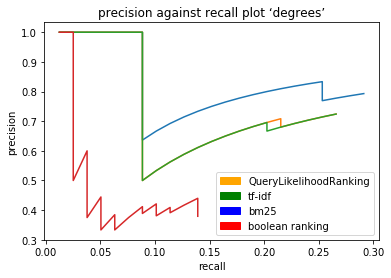

In [92]:
plt.show(b)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision against recall plot ‘degrees’')
green_patch = mpatches.Patch(color='green', label='tf-idf')
orange_patch = mpatches.Patch(color='orange', label='QueryLikelihoodRanking')
blue_patch = mpatches.Patch(color='blue', label='bm25')
red_patch = mpatches.Patch(color='red', label='boolean ranking')
plt.legend(handles=[orange_patch,green_patch,blue_patch,red_patch])


# recall, precision, F1

In [13]:

def f1_pr_rc(retrieved_list,num_pos):
    a=retrieved_list
    r=sum(a)/num_pos #recall
    p=sum(a)/len(a) #precision
    F1=2*r*p/(r+p)
    return r,p,F1


In [14]:
q_rpf=f1_pr_rc(q.b_relevance,87)
bm_rpf=f1_pr_rc(bm.b_relevance,87)
ti_rpf=f1_pr_rc(ti.b_relevance,87)
bo_rpf=f1_pr_rc(bo.b_relevance,87)
bmp_rpf=f1_pr_rc(bmp.b_relevance,87)
qp_rpf=f1_pr_rc(qp.b_relevance,87)
tip_rpf=f1_pr_rc(tip.b_relevance,87)

In [15]:
bm_rpf,q_rpf,ti_rpf,bo_rpf,bmp_rpf,qp_rpf,tip_rpf

((0.27586206896551724, 0.80000000000000004, 0.4102564102564103),
 (0.25287356321839083, 0.73333333333333328, 0.37606837606837612),
 (0.25287356321839083, 0.73333333333333328, 0.37606837606837612),
 (0.13793103448275862, 0.40000000000000002, 0.20512820512820515),
 (0.10344827586206896, 0.29999999999999999, 0.15384615384615385),
 (0.068965517241379309, 0.20000000000000001, 0.10256410256410257),
 (0.12643678160919541, 0.36666666666666664, 0.18803418803418806))

In [32]:
q.b_relevance

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    1
Name: b_relevance, dtype: int64

# Average Precision( AP)

In [54]:
def average_precision(retrieved_list):
    a=retrieved_list
    #a =[1,0,1,1,0,0,1,0,0,1]
    p2=[]
    for i,ai in enumerate(a):
        if ai == 1:
            p2.append(sum(a[:i+1])/(i+1))
    ap=sum(p2)/len(p2)
    return ap

In [76]:
q_ap=average_precision(q.b_relevance)
bm_ap=average_precision(bm.b_relevance)
ti_ap=average_precision(ti.b_relevance)

In [80]:
q_ap,bm_ap,ti_ap

(0.7680453371057574, 0.83884467417763642, 0.76675745831787867)

# precision at rank k(1,5,10)

In [57]:
def rank_precision(rank_k,retrieved_list):
    precision=sum(retrieved_list[:rank_k])/rank_k
    return precision

In [58]:
q_k=[rank_precision(1,q.b_relevance),rank_precision(5,q.b_relevance),rank_precision(10,q.b_relevance)]
bm_k=[rank_precision(1,bm.b_relevance),rank_precision(5,bm.b_relevance),rank_precision(10,bm.b_relevance)]
ti_k=[rank_precision(1,ti.b_relevance),rank_precision(5,ti.b_relevance),rank_precision(10,ti.b_relevance)]

In [59]:
q_k,bm_k,ti_k

([1.0, 1.0, 0.69999999999999996],
 [1.0, 1.0, 0.69999999999999996],
 [1.0, 1.0, 0.69999999999999996])

# R rank precision(1,3,5) and reciprocal rank (r=1)

In [25]:
def r_rank(num_rd,retrieved_list):
    a_trans=np.cumsum(retrieved_list)
    a_l = list(a_trans)
    r_precision=num_rd/(a_l.index(num_rd)+1)
    return r_precision

In [26]:
q_r=[r_rank(1,q.b_relevance),r_rank(3,q.b_relevance),r_rank(5,q.b_relevance)]
bm_r=[r_rank(1,bm.b_relevance),r_rank(3,bm.b_relevance),r_rank(5,bm.b_relevance)]
ti_r=[r_rank(1,ti.b_relevance),r_rank(3,ti.b_relevance),r_rank(5,ti.b_relevance)]

In [27]:
q_r,bm_r,ti_r

([1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0])

# Search length

all ones

# DCG

In [16]:
def DCG(k,retrieved_list):
    return retrieved_list[0] + np.sum(retrieved_list[1:k] / np.log2(np.arange(2, k + 1)))


In [17]:
DCG(30,bm.relevance),DCG(30, q.relevance),DCG(30,ti.relevance),DCG(30,bo.relevance),DCG(30,bmp.relevance),DCG(30,qp.relevance),DCG(30,tip.relevance)

(12.164764889692828,
 10.300854059306404,
 9.3690716193322938,
 8.5149262617025183,
 7.8322410335936308,
 6.433265569569012,
 8.0554284626729711)

# Significant level test 